<a href="https://colab.research.google.com/github/satanjj10/tibaml0606/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7fb6f9a35c10>)

In [4]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
predict_df = pd.read_csv("test.csv", encoding="utf-8")

In [5]:
predict_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# 加總
df = pd.DataFrame([
    [1, 2],
    [3, 4]
])
df.sum(axis=1)

0    3
1    7
dtype: int64

In [7]:
# pandas篩選: 篩選[針對每一筆給出True/False]，可以和apply一起操作
df1 = pd.DataFrame([
    [1, 2],
    [3, 4]
])
df1[[False, True]]
s = pd.Series(["A", "B", "C"])
s[[True, True, False]]

0    A
1    B
dtype: object

In [8]:
# axis: 0->合併為縱向， 1->合併為橫向
#ignore_index: True->捨棄標籤，用數字重新排列(原本的最後一列並沒有到1309，重新排列後就有到)， False->維持原本的標籤
# NAN: 空值
datas = pd.concat([train_df, predict_df], axis=0, ignore_index=True)
# 把Passenger和Survived欄刪掉
datas = datas.drop(["PassengerId", "Survived"], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
# 資料預處理
# Step1. 填補空值
#1.1 確認有多少個空值
s = datas.isna().sum()
# s[s!=0]: 篩選(filter)操作
s[s != 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [10]:
# 1.2 check 每一個欄位是哪一種型態
# a. 數值: Age, SibSp, Parch, Ticket(#share), Fare
# b. 類別: Pclass, Name(mid), Sex, Cabin(first), Embarked
# 補空值(最可能出現的值)
# 類別: 最常出現的值
# 數值: 絕對不是平均值, 而是中位數!!! 不是因為平均對中位數有什麼影響! 他們本就是兩種不同統計值! 我們的需求是最可能的值(不大不小的值)

In [11]:
# 處理一下 ticket/name/cabin
def cabinchange(c):
  # 如果是空的，回傳None
    if pd.isna(c):
        return None
    else:
        return c[0]
datas["Cabin"] = datas["Cabin"].apply(cabinchange)

In [12]:
# value_counts計算每一種值出現幾次，幾個人用同一張票，類似創立一個字典，填相對應的值
counts = datas["Ticket"].value_counts()
def ticketchange(t):
    if pd.isna(t):
        return None
    else:
        return counts[t]
datas["Ticket"] = datas["Ticket"].apply(ticketchange)

In [13]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,7.2500,None,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,7.9250,None,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,1,8.0500,None,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,3,108.9000,C,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,1,7.2500,None,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,1,8.0500,None,S


In [14]:
import re
# n = "Braund, Mr. Owen Harris"
# r為不執行\(換行)
# .+: 任意一個字一次以上 ,: 逗號 (.+): 任意一個字一次以上, 並且group起來 \.: 點 .+: 任意一個字一次以上
def namechange(n):
    pat = r".+,(.+)\..+"
    return re.match(pat, n).group(1).strip()
datas["Name"].apply(namechange)

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [15]:
# n = "Braund, Mr. Owen Harris"
def namechange(n):
    return n.split(",")[-1].split(".")[0].strip()
datas["Name"] = datas["Name"].apply(namechange)

In [16]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,None,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,None,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,1,8.0500,None,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,None,S
1307,3,Mr,male,NaN,0,0,1,8.0500,None,S


In [17]:
# 類別: 最常出現值的替代空值
# idxmax: 找出最常出現的index(Embarked為S)
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)
# check一下還缺多少
s = datas.isna().sum()
s[s != 0].sort_values(ascending=False)

Cabin    1014
Age       263
Fare        1
dtype: int64

In [18]:
# 數值補中位數
# Pclass不能用中位數補，因為他是類別
med = datas.median().drop(["Pclass"])
# 補空值
datas = datas.fillna(med)
# check一下還缺多少
s = datas.isna().sum()
s[s != 0].sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Cabin    1014
dtype: int64

In [19]:
# One-Hot一定要做, 但是為了美觀, 我可以把太過稀少的去除掉
# 把出現次數小於50的轉為None，待會再一次性One-Hot
count = datas["Name"].value_counts()
reserved = count[count > 50].index
def namefilter(mid):
    if mid in reserved:
        return mid
    else:
        return None
datas["Name"] = datas["Name"].apply(namefilter)

In [20]:
# 額外補充: 可以用字典一次性填補空值，以下為範例
df = pd.DataFrame([
    [1, 2, "a"],
    [None, None, None],
], columns=["D", "E", "F"])
fill = {"D":2.5, "E":3.1, "F":"bbb"}
df.fillna(fill)

,D,E,F
0,1.0,2.0,a
1,2.5,3.1,bbb


In [21]:
# 資料處理一定要用決策樹想過，沒必要的不需處理
# Pclass很特別: 雖然他是類別, 但他的類別是有大小關係的, 所以你不做可以
# 做不做各有各的好處, 但我試過了!!! 所以這裡我做
# Sex可以不做: 因為二值
# display.max_colums -> show出30個columns
pd.set_option('display.max_columns', 30)
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [22]:
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [23]:
# 如何換欄位
df = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"])
df[["b", "a"]]

,b,a
0,2,1
1,4,3


In [24]:
df = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
], index=["a", "b", "c"])
# .iloc: 依據你的第幾列(只取0和2列) -> [1st, 2nd, 3rd]
df.iloc[[0, 2]]
# .loc: 依據你的列標籤(範圍全曲)
df.loc[["a", "c"]]

,0,1
a,1,2
c,5,6


In [25]:
# 切開
import numpy as np
x = np.array(datas.iloc[:len(train_df)])
y = np.array(train_df["Survived"])
x_predict = np.array(datas.iloc[len(train_df):])

[Text(0.5, 0.875, 'Name_Mr <= 0.5\ngini = 0.461\nsamples = 557\nvalue = [570, 321]'),
 Text(0.25, 0.625, 'Pclass_3 <= 0.5\ngini = 0.436\nsamples = 230\nvalue = [117, 247]'),
 Text(0.125, 0.375, 'Sex_male <= 0.5\ngini = 0.262\nsamples = 120\nvalue = [29, 158]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Age <= 38.5\ngini = 0.5\nsamples = 110\nvalue = [88, 89]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Cabin_E <= 0.5\ngini = 0.241\nsamples = 327\nvalue = [453, 74]'),
 Text(0.625, 0.375, 'SibSp <= 1.5\ngini = 0.226\nsamples = 315\nvalue = [441, 66]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Age <= 44.0\ngini = 0.48\nsamples = 12\nvalue = [12, 8]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

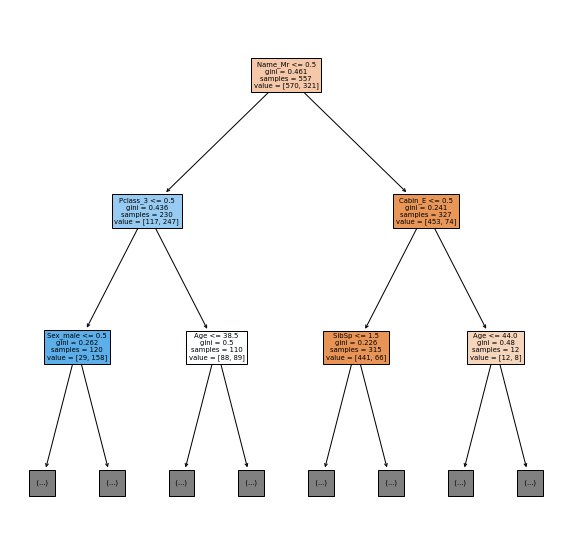

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
# n_estimators=10給幾棵樹(幾層)
# n_jobs 可以做切割(平行化)，通常設定4或8(代表幾核心)，-1為有多少核心就給多少核心
clf = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1)
clf.fit(x, y)
plt.figure(figsize=(10, 10))
# 你可以挑選十顆裡面的某科把它畫出來, 看一下什麼叫做略有不同
plot_tree(clf.estimators_[3], feature_names=datas.columns, filled=True, max_depth=2)

In [27]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=71, max_depth=6)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))

[0.83333333 0.88764045 0.75280899 0.8988764  0.85393258 0.82022472
 0.84269663 0.78651685 0.87640449 0.83146067]
0.8383895131086142


In [28]:
# 類似迴圈，交叉驗證
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
params = {
    "n_estimators":range(11, 150, 2),
    "max_depth":[5, 6, 7, 8, 9, 10]
}
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'n_estimators': range(11, 150, 2)})

In [29]:
cv.best_params_

{'max_depth': 7, 'n_estimators': 81}

In [30]:
clf = RandomForestClassifier(n_estimators=51, max_depth=6)
clf.fit(x, y)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
pd.DataFrame({
    "importance":clf.feature_importances_
}, index=datas.columns).sort_values(by="importance", ascending=False)

AttributeError: ignored

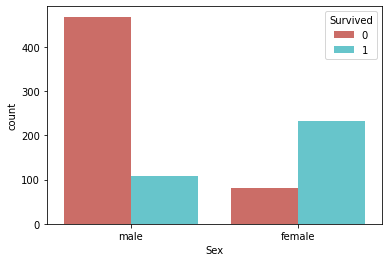

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=train_df["Sex"], hue=train_df["Survived"], palette=sns.color_palette("hls", 2))

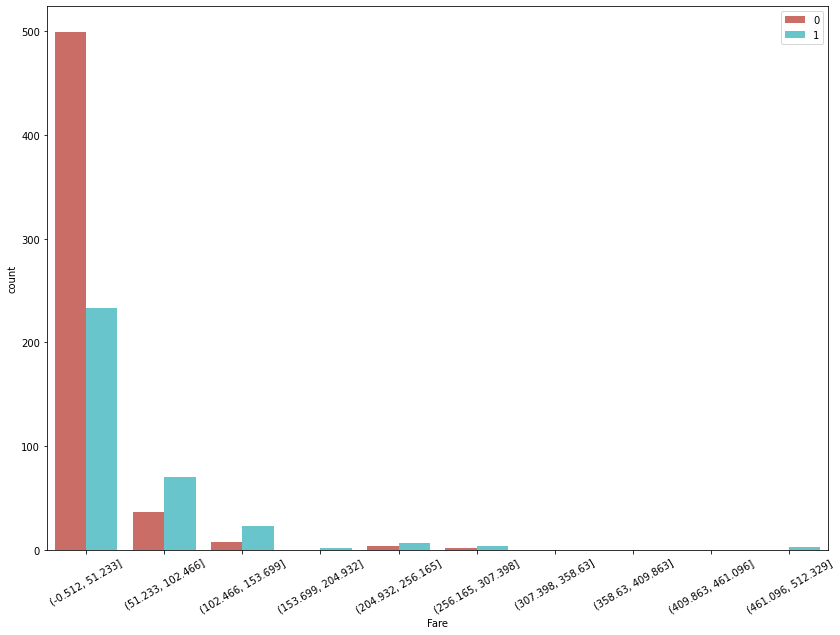

In [38]:
plt.figure(figsize=(14, 10))
fcut = pd.cut(train_df["Fare"], 10)
sns.countplot(x=fcut, hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")

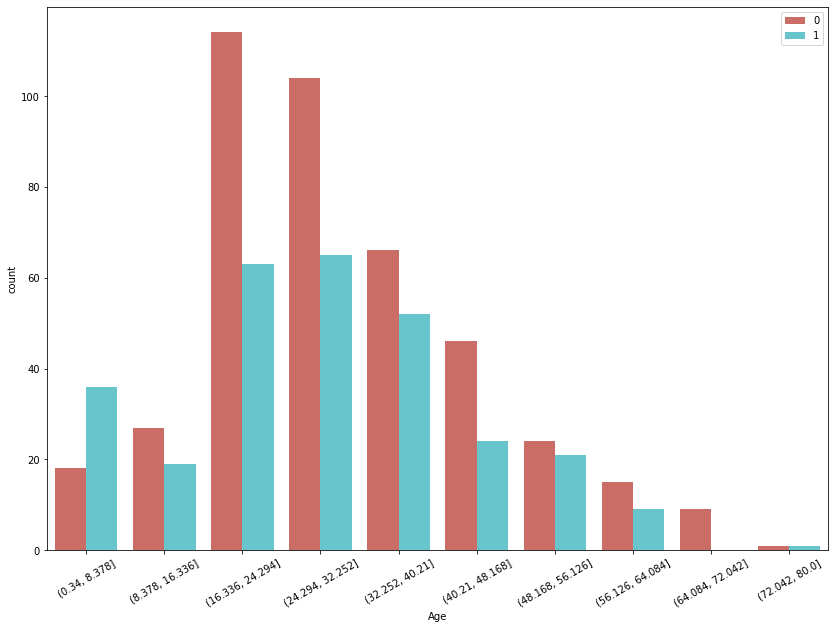

In [39]:
plt.figure(figsize=(14, 10))
fcut = pd.cut(train_df["Age"], 10)
sns.countplot(x=fcut, hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")

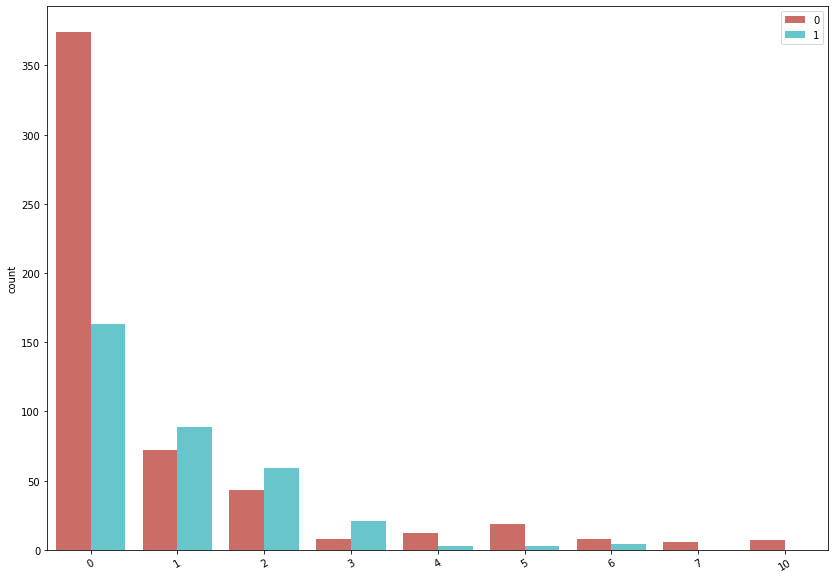

In [41]:
plt.figure(figsize=(14, 10))
sns.countplot(x=train_df["SibSp"]+train_df["Parch"], hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
# 已經是np array, 所以不是用.iloc(pandas)
x_scale = datas_scale[:len(train_df)]
x_predict_scale = datas_scale[len(train_df):]

In [32]:
# fit為找最大值和最小值
# transform為找出最大/小值後轉換
# 不存在隨機性
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 50)
}
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_scale, y)
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 7}
0.832796504369538


In [35]:
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 50)
}
cv = GridSearchCV(clf, params, scoring="f1", cv=10, n_jobs=-1)
cv.fit(x_scale, y)
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 7}
0.761215662591535


In [33]:
# 我手動的調整過
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
# 處理更詳盡, maybe可以試試 ticket-SibSp-Parch